In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github/ERA-v1/S6

/content/drive/MyDrive/Github/ERA-v1/S6


In [3]:
%ls

'model copy.py'   model.py   __pycache__/   S6.ipynb   utils.py


In [4]:
# !git pull

CODE BLOCK: 1

In [5]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [6]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 32, 22, 22]           4,640
              ReLU-8           [-1, 32, 22, 22]               0
       BatchNorm2d-9           [-1, 32, 22, 22]              64
           Conv2d-10           [-1, 32, 11, 11]           1,056
             ReLU-11           [-1, 32, 11, 11]               0
      BatchNorm2d-12           [-1, 32, 11, 11]              64
    

CODE BLOCK: 3

In [8]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [9]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [10]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

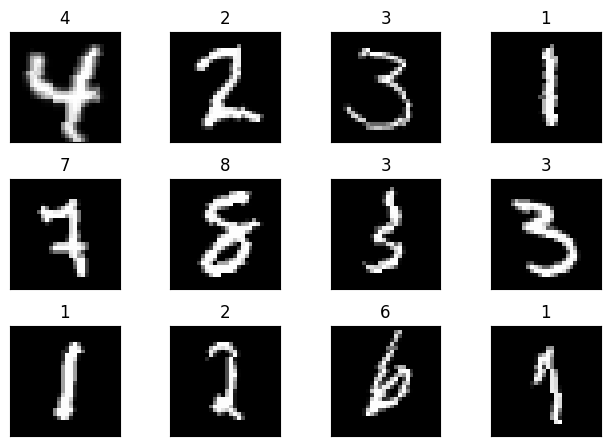

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.0674 Batch_id=117 Accuracy=86.86: 100%|██████████| 118/118 [00:31<00:00,  3.70it/s]


Test set: Average loss: 0.0664, Accuracy: 9826/10000 (98.26%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0576 Batch_id=117 Accuracy=97.75: 100%|██████████| 118/118 [00:25<00:00,  4.58it/s]


Test set: Average loss: 0.0418, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0558 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:23<00:00,  4.92it/s]


Test set: Average loss: 0.0378, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0341 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0288, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0493 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:23<00:00,  5.04it/s]


Test set: Average loss: 0.0261, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.0529 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0269, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 7


Train: Loss=0.0912 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0236, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 8


Train: Loss=0.0347 Batch_id=117 Accuracy=98.96: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0252, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 9


Train: Loss=0.0654 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0224, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 10


Train: Loss=0.0154 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0180, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 11


Train: Loss=0.0243 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0166, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 12


Train: Loss=0.0255 Batch_id=117 Accuracy=99.33: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0161, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 13


Train: Loss=0.0314 Batch_id=117 Accuracy=99.28: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]


Test set: Average loss: 0.0156, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 14


Train: Loss=0.1030 Batch_id=117 Accuracy=99.36: 100%|██████████| 118/118 [00:23<00:00,  4.93it/s]


Test set: Average loss: 0.0155, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 15


Train: Loss=0.0070 Batch_id=117 Accuracy=99.36: 100%|██████████| 118/118 [00:24<00:00,  4.89it/s]


Test set: Average loss: 0.0158, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 16


Train: Loss=0.0206 Batch_id=117 Accuracy=99.36: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0151, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 17


Train: Loss=0.0162 Batch_id=117 Accuracy=99.35: 100%|██████████| 118/118 [00:23<00:00,  5.02it/s]


Test set: Average loss: 0.0154, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 18


Train: Loss=0.0151 Batch_id=117 Accuracy=99.39: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0157, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 19


Train: Loss=0.0713 Batch_id=117 Accuracy=99.37: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0154, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 20


Train: Loss=0.0230 Batch_id=85 Accuracy=99.46:  72%|███████▏  | 85/118 [00:18<00:07,  4.23it/s]

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()

# Git Push

In [ ]:
!git add .

In [ ]:
!git config --global user.email "me18b059@smail.iitm.ac.in"
!git commit -m Final

In [ ]:
!git push